In [24]:
import os
import re
from nltk.stem import WordNetLemmatizer 
from string import punctuation
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,f1_score,r2_score
from sklearn.preprocessing import 

###  Getting the email

In [4]:
listofspam=[]#list ou on va mettre tous les spam
listofham=[]#list ou on va mettre tous les non spam
spam=os.listdir("D:\S2I M1\S2\AARN\projet\DATA\DATA\spam")#list of entries in the file

for i in spam :
        try :
            f=open(os.path.join("D:\S2I M1\S2\AARN\projet\DATA\DATA\spam/",i),'r', encoding='utf-8')#join pathq
            content=f.read()
        except UnicodeDecodeError:#if the file is code with other than utf-8
            open(os.path.join("D:\S2I M1\S2\AARN\projet\DATA\DATA\spam/", i), "r", encoding="latin-1")
            content = f.read()
            open(os.path.join("D:\S2I M1\S2\AARN\projet\DATA\DATA\spam/", i), "w", encoding="utf-8")
            f.write(content)
        listofspam.append(content)
ham=os.listdir("D:\S2I M1\S2\AARN\projet\DATA\DATA\ham")
for i in ham:
    try :
        f=open(os.path.join("D:\S2I M1\S2\AARN\projet\DATA\DATA\ham/",i),'r', encoding='utf-8')
        content=f.read()
    except UnicodeDecodeError:
        open(os.path.join("D:\S2I M1\S2\AARN\projet\DATA\DATA\ham/", i), "r", encoding="latin-1")
        content = f.read()
        open(os.path.join("D:\S2I M1\S2\AARN\projet\DATA\DATA\ham/", i), "w", encoding="utf-8")
        f.write(content)
    listofham.append(content)

### Preparation of data

In [6]:
lemmatizer = WordNetLemmatizer() 
def datapreparation(k):
    k=k.lower()#lower case
    k=re.sub("<.*?>","",k)#dropping balise html
    k=k.replace('$','dollar')#normalizing $
    k=re.sub('[1-9]+','nombre',k)#normalizing numbers
    k=re.sub('(http|https)://[^\s]+','httpaddr',k)#normalizing url
    k=re.sub('[^\s]+@[^\s]+', 'emailaddr',k)#normalizing mail
    k=k.translate(str.maketrans('', '', punctuation)) #dropping punctuations
    k= re.sub("\n"," ",k)#dropping line breaks
    #lemmatization
    for w in k:
        if w.isalpha():
            w=lemmatizer.lemmatize(w)
    k=re.sub(r'\W+',' ',k)#dropping space and other caracters
    
    
    return k

In [9]:
for i in range(len(listofspam)):
    listofspam[i]=datapreparation(listofspam[i])
for i in range(len(listofham)):
    listofham[i]=datapreparation(listofham[i])
#print(listofspam[0]) #to see an example 
#type(listofspam[0]) is str

### Construction du vocabulaire

In [10]:
#constructing a list of 10000 most common words in listofspam to work with
def vocabulaire(l):
    letter=Counter()
    mat=[]
    for i in range(len(l)):
        mat=l[i].split()
        letter.update(mat)
    letter=sorted(letter, key=letter.get, reverse=True)
    letter=letter[:10000]
    #letter=Counter(l[0]).most_common(10000)
    fichier=open('vocab.txt','w',encoding="utf-8")
    for i in letter:
        fichier.writelines(i)
        fichier.writelines("\n")
    fichier.close()
    return letter

In [11]:
voclist=vocabulaire(listofspam)

### Preparing our dataFrame

In [12]:
df1=pd.DataFrame(listofspam,columns=['email'])
df1['state']=1
df2=pd.DataFrame(listofham,columns=['email'])
df2['state']=0

In [13]:
df=pd.concat([df2,df1])
df=df.sample(frac=1,random_state=123).reset_index(drop=True)


### Extraction of caracteristics

In [14]:
def caract(chaine,lis):
    mat=np.zeros(len(lis))
    for i in range(len(lis)):
        if lis[i] in chaine:
            mat[i]=1
    return mat
    

In [15]:
array=[]
for i in range(df.shape[0]):
    array.append(caract(df.iloc[i,0],voclist))

In [18]:
email=np.array(array)
state=df['state']

### splitting the data

In [19]:
x_train,x_test,y_train,y_test=train_test_split(email,state,test_size=0.3,random_state=123)

###  Logistic Regression

In [20]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


C:\Users\asmas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print('the score of the training data is :',lr.score(x_train,y_train))
print('the score of the testing data is :',lr.score(x_test,y_test))

the score of the training data is : 1.0
the score of the testing data is : 0.9825136612021858


In [22]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [25]:
print('the R squared of the training data is :',r2_score(y_train,y_pred_train))
print('the R squared of the testing data is :',r2_score(y_test,y_pred_test))
print('-'*100)
print('the f1 of the training data is :',f1_score(y_train,y_pred_train))
print('the f1 of the testing data is :',f1_score(y_test,y_pred_test))

the R squared of the training data is : 1.0
the R squared of the testing data is : 0.9296775928985896
----------------------------------------------------------------------------------------------------
the f1 of the training data is : 1.0
the f1 of the testing data is : 0.981042654028436


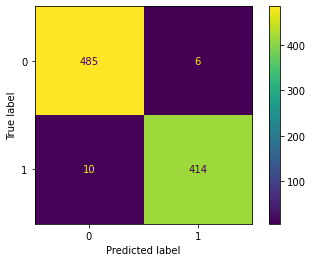

In [26]:
plot_confusion_matrix(lr, x_test, y_test)  
plt.show()

### SVM

In [27]:
sv=svm.SVC()
sv.fit(x_train,y_train)

SVC()

In [28]:
print('the score of the training data is :',sv.score(x_train,y_train))
print('the score of the testing data is :',sv.score(x_test,y_test))

the score of the training data is : 0.9934364744491326
the score of the testing data is : 0.9825136612021858


In [29]:
y_pred_train=sv.predict(x_train)
y_pred_test=sv.predict(x_test)

In [30]:
print('the R squared of the training data is :',r2_score(y_train,y_pred_train))
print('the R squared of the testing data is :',r2_score(y_test,y_pred_test))
print('-'*100)
print('the f1 of the training data is :',f1_score(y_train,y_pred_train))
print('the f1 of the testing data is :',f1_score(y_test,y_pred_test))

the R squared of the training data is : 0.9735425452741255
the R squared of the testing data is : 0.9296775928985896
----------------------------------------------------------------------------------------------------
the f1 of the training data is : 0.9928057553956835
the f1 of the testing data is : 0.9811764705882354


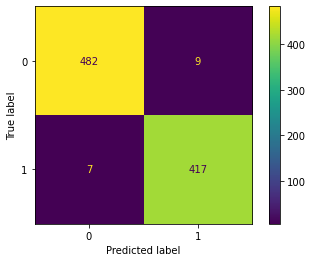

In [31]:
plot_confusion_matrix(sv, x_test, y_test)  
plt.show()

### NN

In [32]:
nn= MLPClassifier()
nn.fit(x_train,y_train)

MLPClassifier()

In [36]:
print('the score of the training data is :',nn.score(x_train,y_train))
print('the score of the testing data is :',nn.score(x_test,y_test))

the R squared of the training data is : 1.0
the R squared of the testing data is : 0.9901639344262295


In [34]:
y_pred_train=nn.predict(x_train)
y_pred_test=nn.predict(x_test)

In [ ]:
print('the R squared of the training data is :',r2_score(y_train,y_pred_train))
print('the R squared of the testing data is :',r2_score(y_test,y_pred_test))
print('-'*100)
print('the f1 of the training data is :',f1_score(y_train,y_pred_train))
print('the f1 of the testing data is :',f1_score(y_test,y_pred_test))

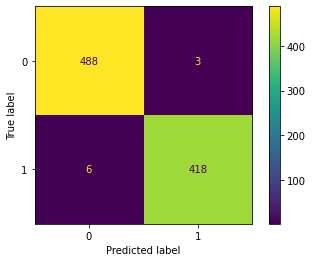

In [41]:
plot_confusion_matrix(nn, x_test, y_test)   
plt.show()
